<a href="https://colab.research.google.com/github/ASatya-J107/DS_Project5_Clustering/blob/main/Data_Science_Project_5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

data documentation: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
url ='https://raw.githubusercontent.com/ASatya-J107/DS_Project5_Clustering/main/segmentation_data.csv'
customer_info = pd.read_csv(url)
customer_info.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
num_col = ['ID','Age','Income']
cat_col = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

customer_info[cat_col] = customer_info[cat_col].astype('str')

In [ ]:
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [ ]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


# Numerical variables distribution

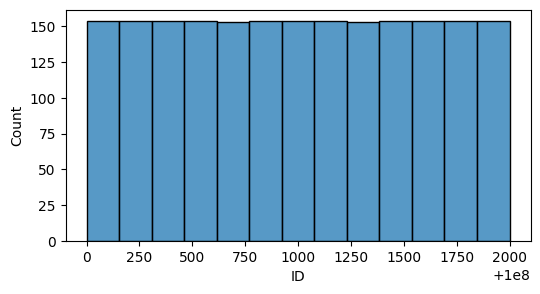

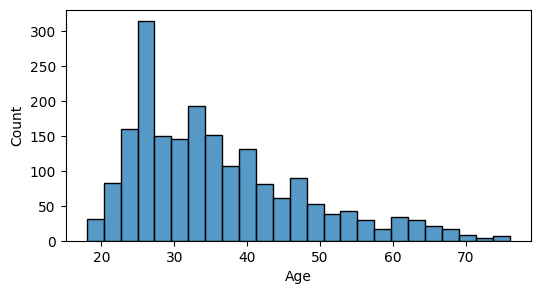

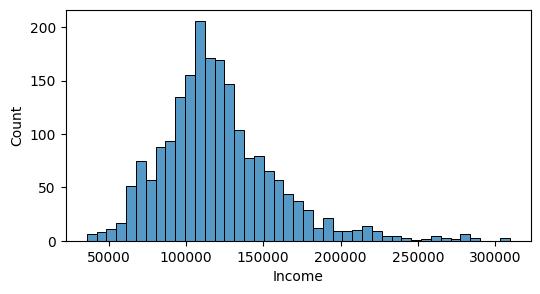

In [ ]:
for numerical in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=customer_info, x=numerical)
  # plt.savefig(numerical+'.png'

# Categorical variables distribution

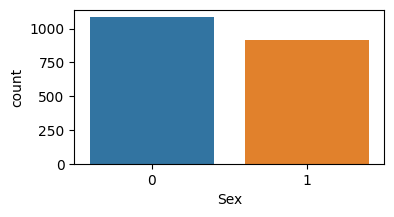

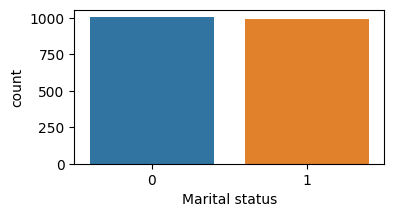

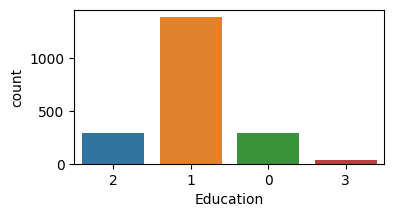

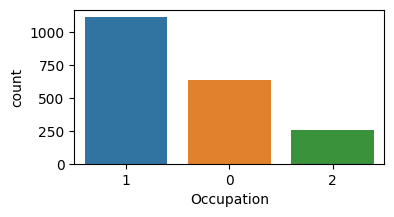

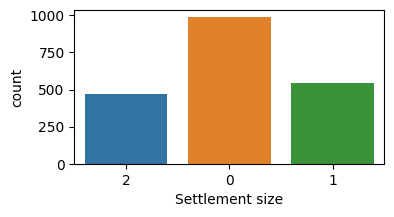

In [ ]:
for category in cat_col:
  plt.figure(figsize=(4,2))
  sns.countplot(data=customer_info,x=category)

# Bivariate analysis

## Numerical features

<Axes: xlabel='Age', ylabel='Income'>

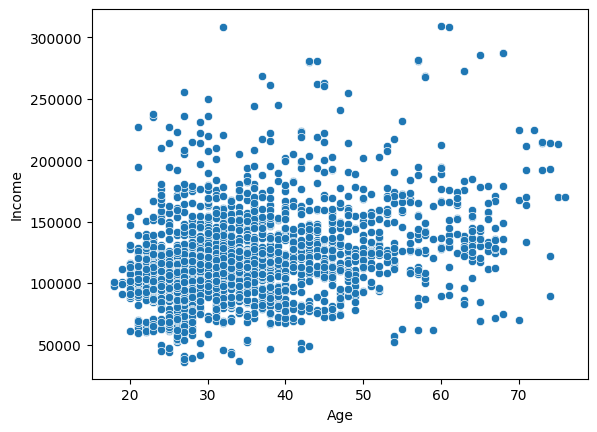

In [ ]:
sns.scatterplot(x='Age',y='Income',data=customer_info)

In [ ]:
import scipy.stats as stats

stats.pearsonr(customer_info['Age'], customer_info['Income'])

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)

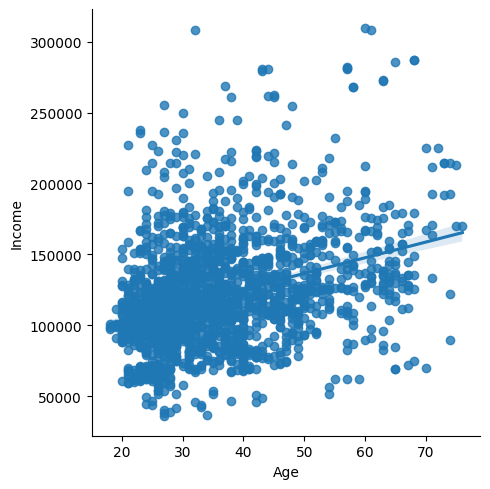

In [ ]:
sns.lmplot(x='Age',y='Income',data=customer_info)

## Categorical vs Numerical

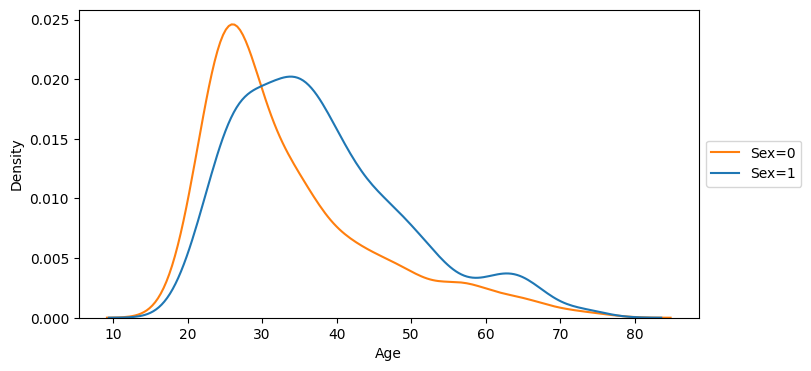

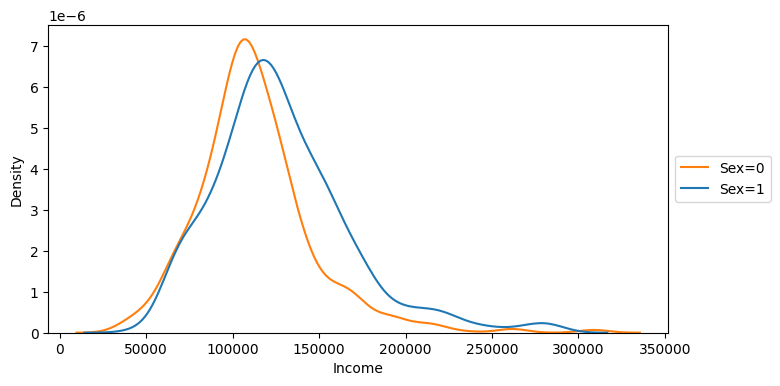

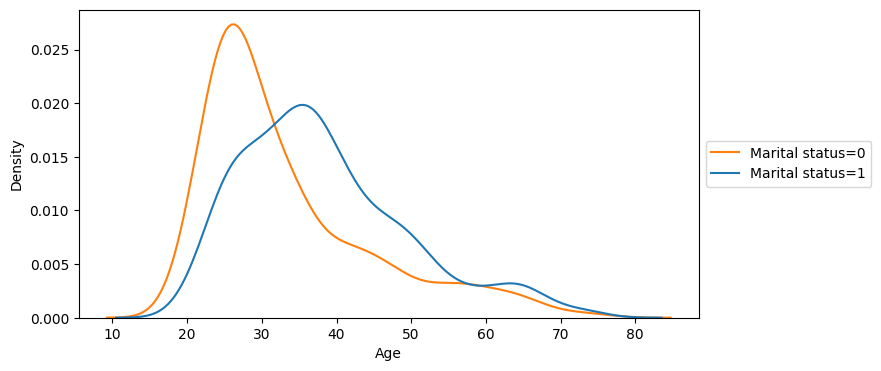

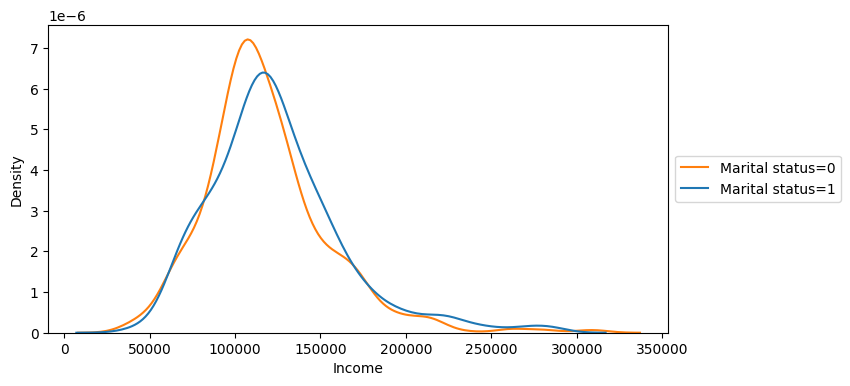

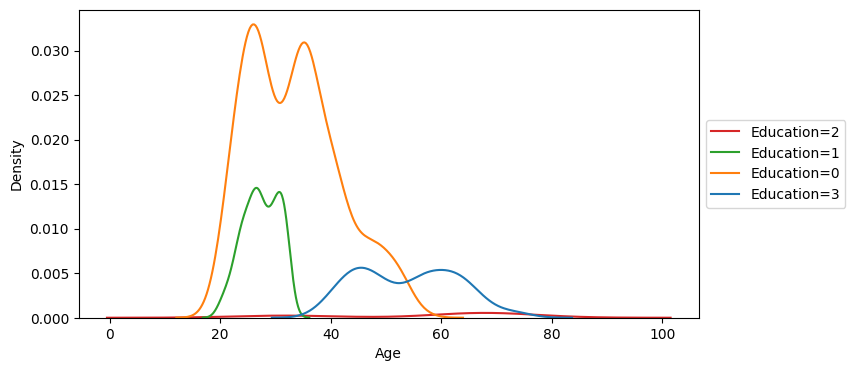

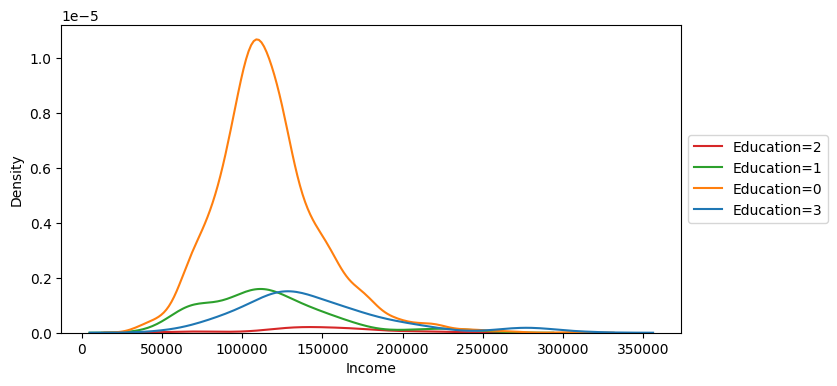

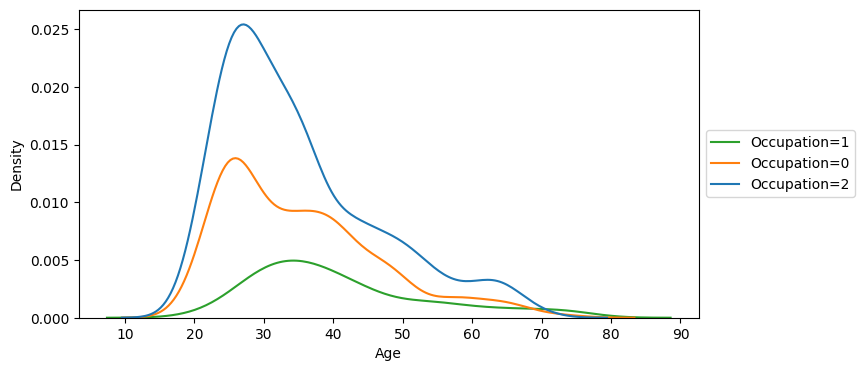

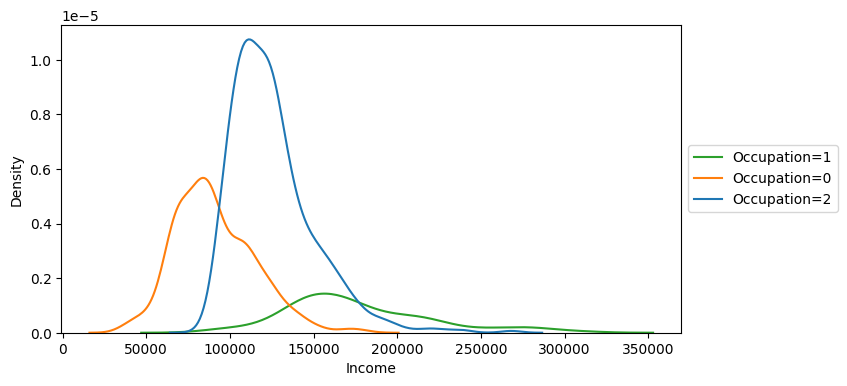

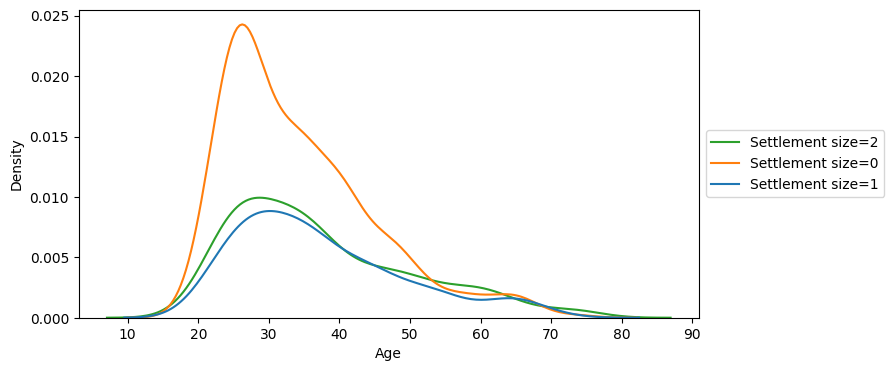

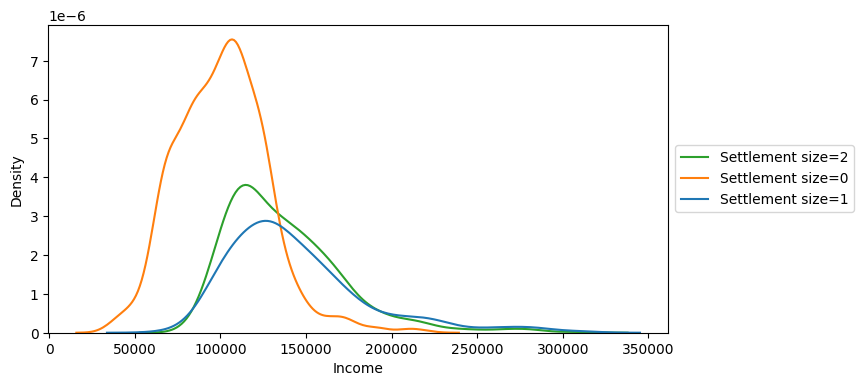

In [ ]:
for category in cat_col:
    for numerical in num_col:
        if numerical != 'ID':
            plt.figure(figsize=(8, 4))  # Adjust figsize as needed
            ax = sns.kdeplot(data=customer_info, x=numerical, hue=category)

            # Create custom legend labels
            legend_labels = [f'{category}={value}' for value in customer_info[category].unique()]

            # Remove the original legend from the plot
            ax.get_legend().remove()

            # Add the legend outside the plot
            plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

            # Show or save the plot as needed
            plt.show()  # Show the plot on screen

## Categorical vs categorical

In [ ]:
cat_col

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

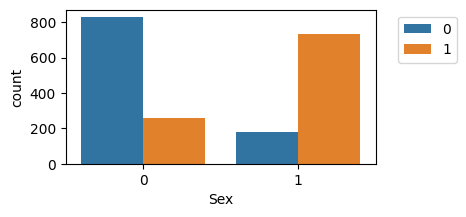

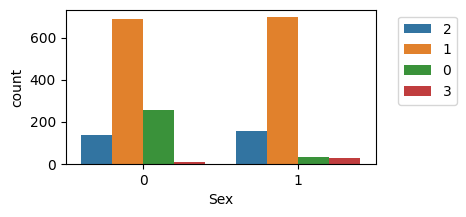

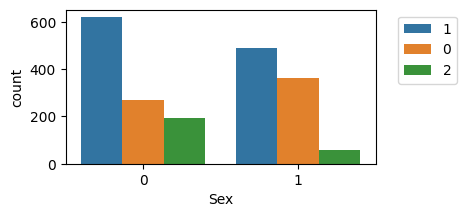

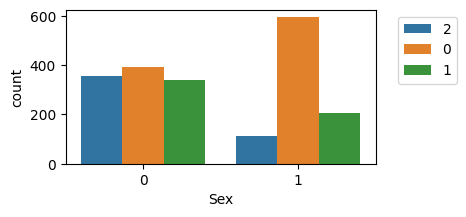

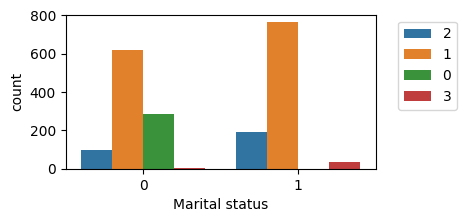

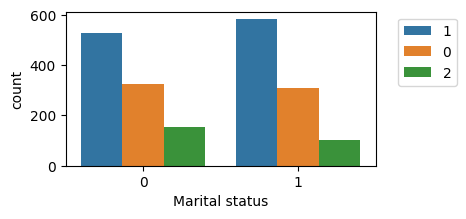

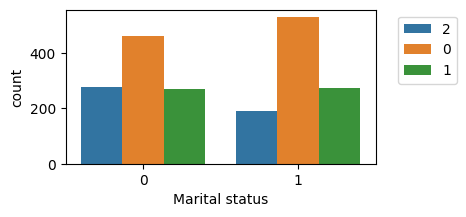

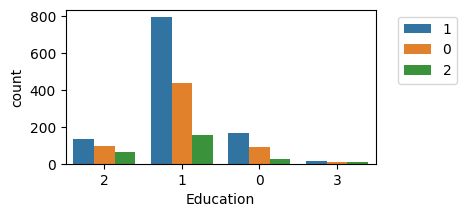

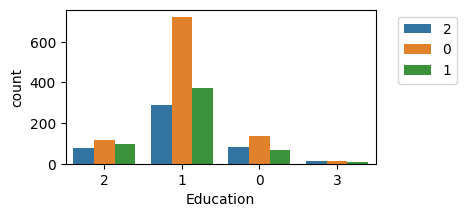

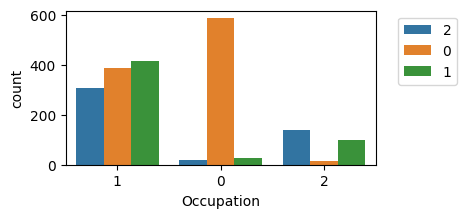

In [ ]:
cat_aux = cat_col.copy()

for category1 in cat_col:
    cat_aux.pop(0)
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(4, 2))
            sns.countplot(data=customer_info, x=category1, hue=category2)

            # Move the legend outside of the chart
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.show()  # Show the plot for each category pair

# Multivariate analysis

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

    # Move the legend outside of the chart
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

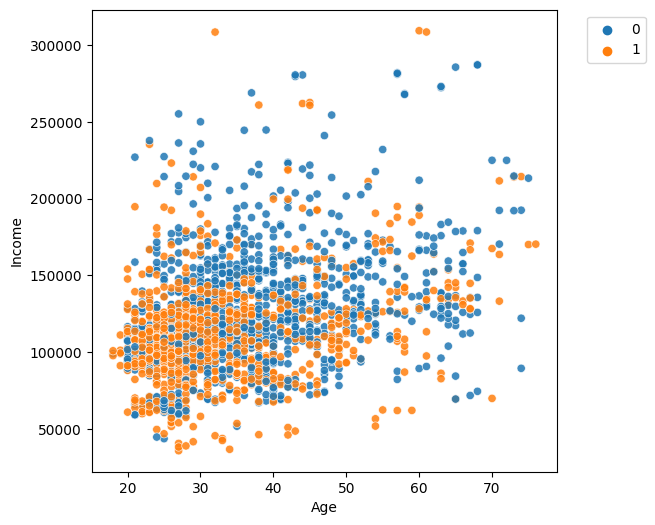

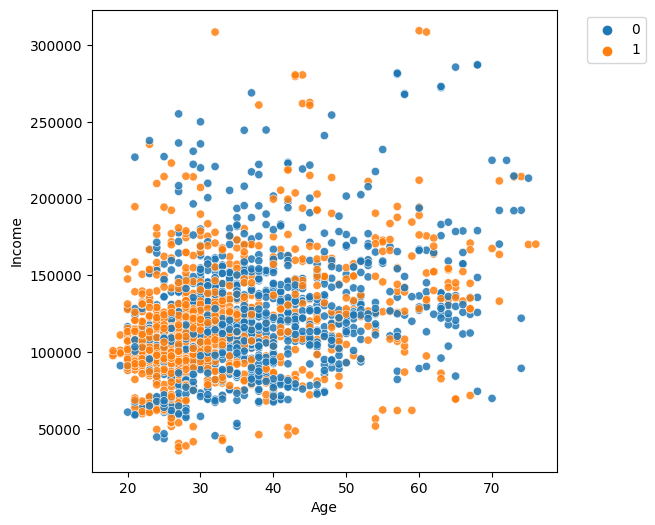

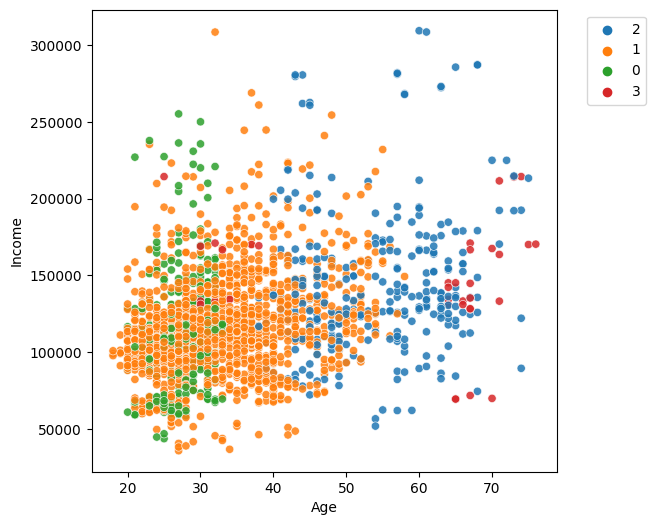

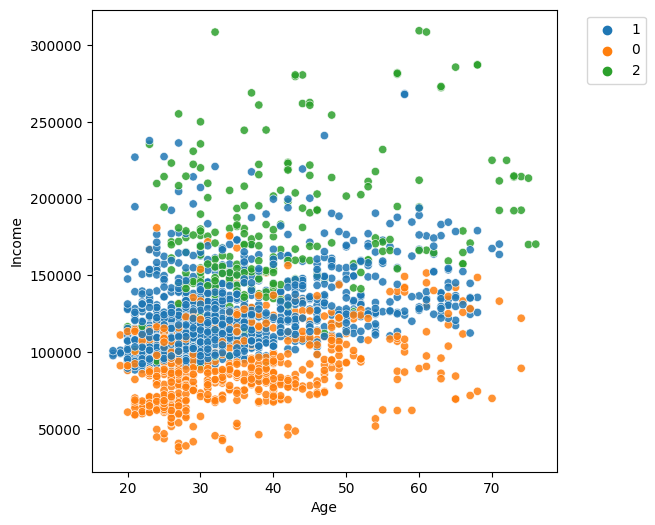

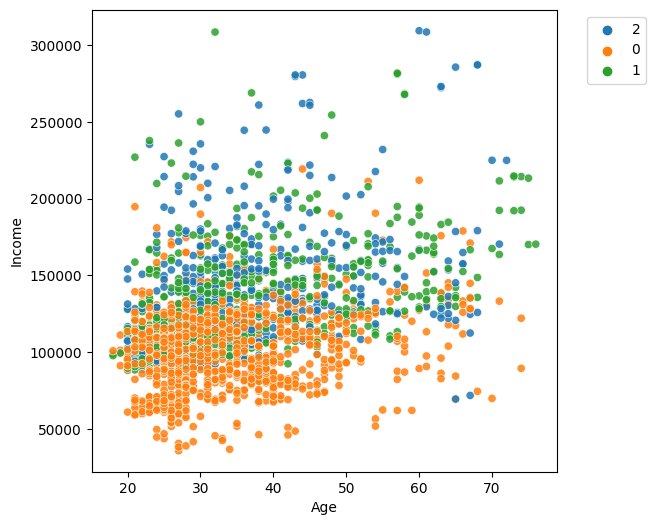

In [ ]:
for cat in cat_col:
    bivariate_scatter('Age', 'Income', cat, customer_info)

# Feature transforming & scaling

* H0 : distribusi normal
* H1 : distribusi tidak normal

In [ ]:
from scipy import stats

normaltest_result_income = stats.normaltest(customer_info['Income'])[1]
normaltest_result_age    = stats.normaltest(customer_info['Age'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of the Age    being Normally distributed is 3.3428344869999675e-56


Karena **_pvalue_** kurang dari 0.05 maka H0 ditolak atau distribusi tidak normal. Untuk menormalisasi data dilakukan log transform dan power transform.

## Feature : Income

In [ ]:
from sklearn.preprocessing import PowerTransformer

def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

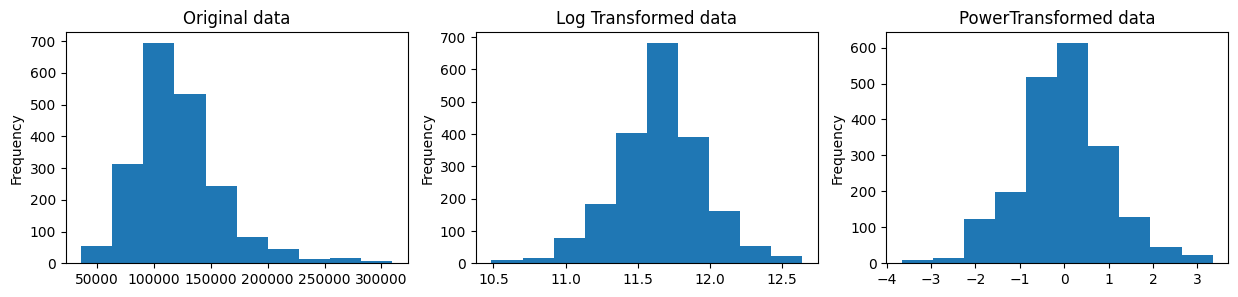

In [ ]:
# PowerTransform data
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


## Feature : Age

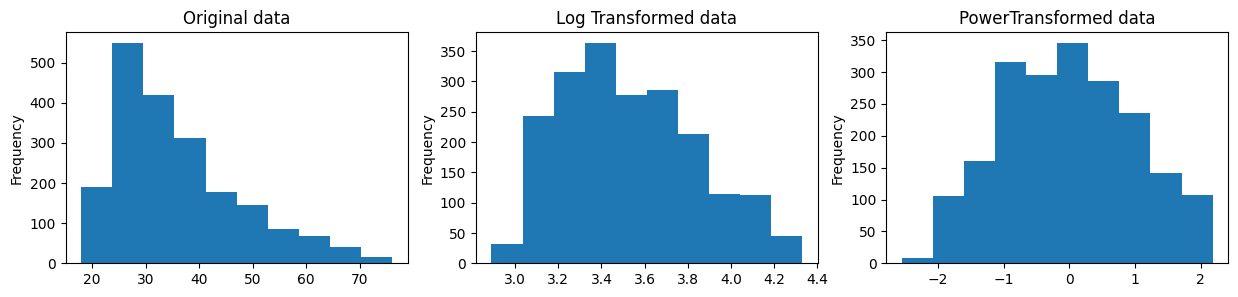

In [ ]:
# PowerTransform data
feature2 = customer_info['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Meskipun data yang didapatkan setelah distribusi belum normal, terjadi perubahan signifikan setelah data di transform. Sehingga akan dilakukan:

* Power Transformation untuk fitur 'Income'
* Log Transformation untuk fitur 'Age

In [ ]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [ ]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


## Feature scaling : MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

In [ ]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651051, 0.91249369])

# Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

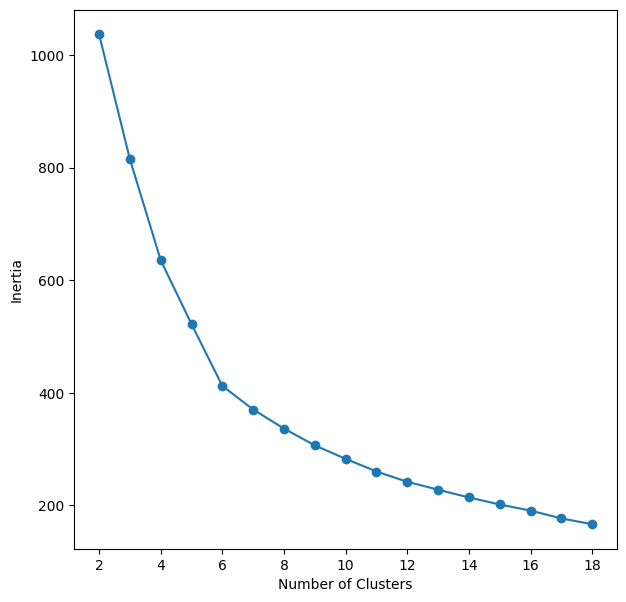

In [ ]:
from sklearn.cluster import KMeans

clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show

## Silhoutte score

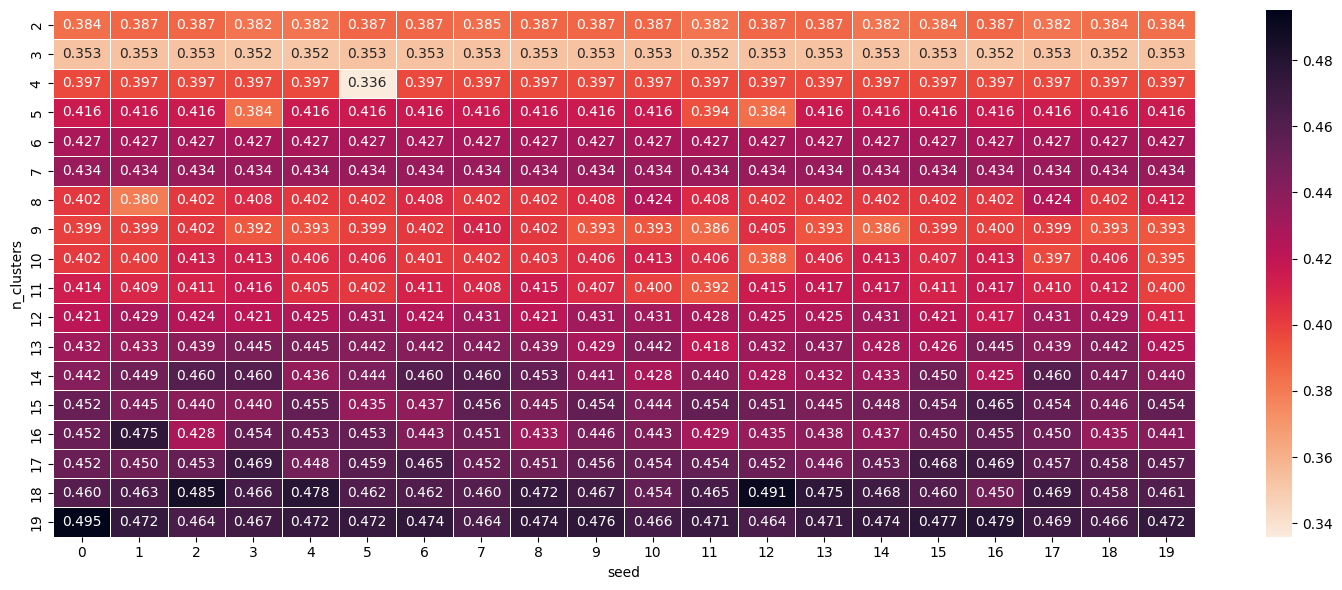

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Dari grafik yang ditunjukkan di atas, kita melihat bahwa ada spike Silhouette score untuk cluster 6 - 7 yang koheren dengan hasil yang kita dapatkan dari metode elbow. Hasil ini menunjukkan bahwa memilih 6 atau 7 cluster menghasilkan kelompok yang terpisah.

Kita putuskan untuk membuat 6 atau 7 cluster dan menggunakan business understanding kita untuk menentukan klasifikasi mana yang memberikan lebih banyak knowledge tentang customer. Pilihan lain adalah memilih 14 atau lebih, yang tidak realistis mengingat data tidak terlalu besar

# Re-running the model for 6-7 clusters

## Creating 3D data with PCA

PCA (Principal Component Analysis) adalah algoritma yang dapat mengurangi dimensi (dimensionality reduction). kita dapat memanfaatkan PCA untuk visualisasi data yang memiliki dimensi yang tinggi

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
labels = kmeans.labels_
X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

X_pca_df.head()

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3


## Visualization

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [ ]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [ ]:
summary = {}

for index in range(6):
   # describe method provides general statistics about the data
   summary[index] = results_df[results_df['Labels'] == index].describe().T

## Cluster 0

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

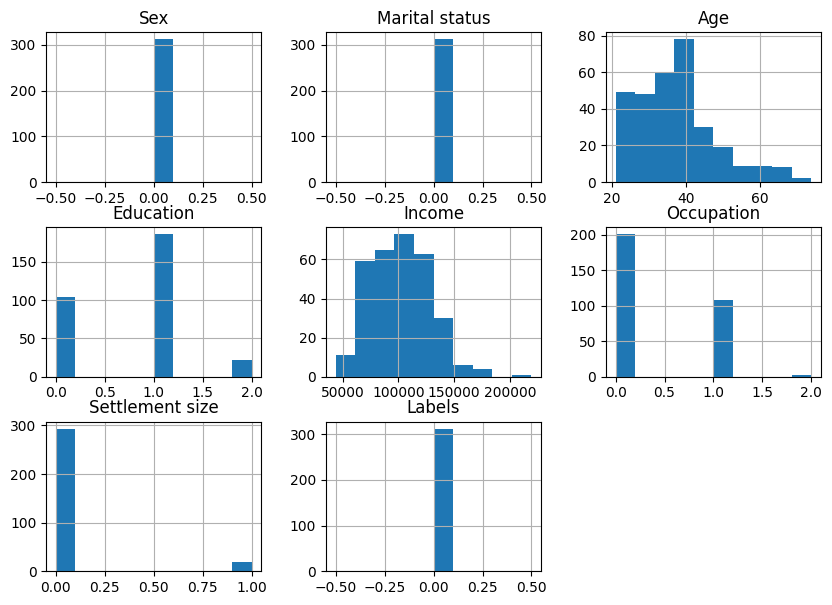

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,7))

## Cluster 1

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

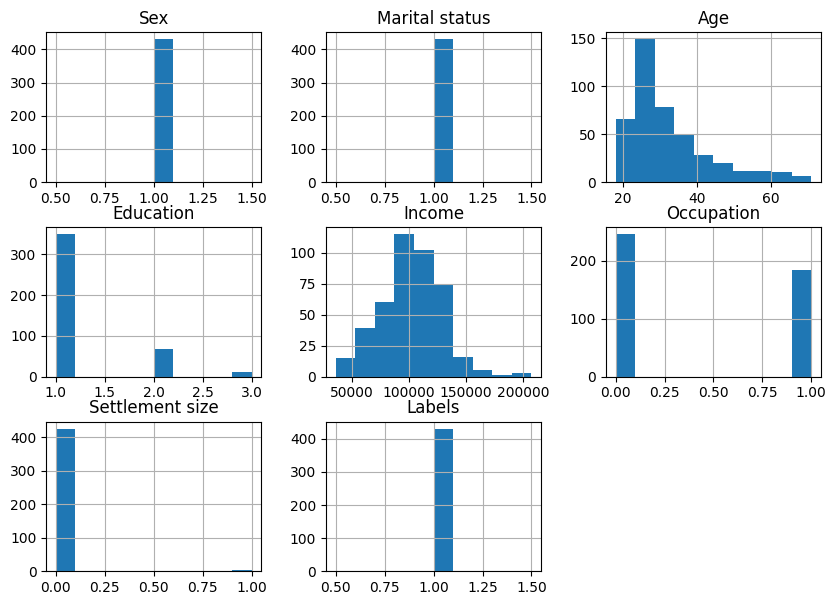

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(10,7))

## Cluster 2

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,306.0,34.284314,13.001925,18.0,25.0,29.0,40.0,76.0
Education,306.0,1.333333,0.572598,1.0,1.0,1.0,2.0,3.0
Income,306.0,136536.702614,38103.456491,88800.0,108455.0,126778.5,155107.0,309364.0
Occupation,306.0,1.183007,0.403881,0.0,1.0,1.0,1.0,2.0
Settlement size,306.0,1.352941,0.511771,0.0,1.0,1.0,2.0,2.0
Labels,306.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

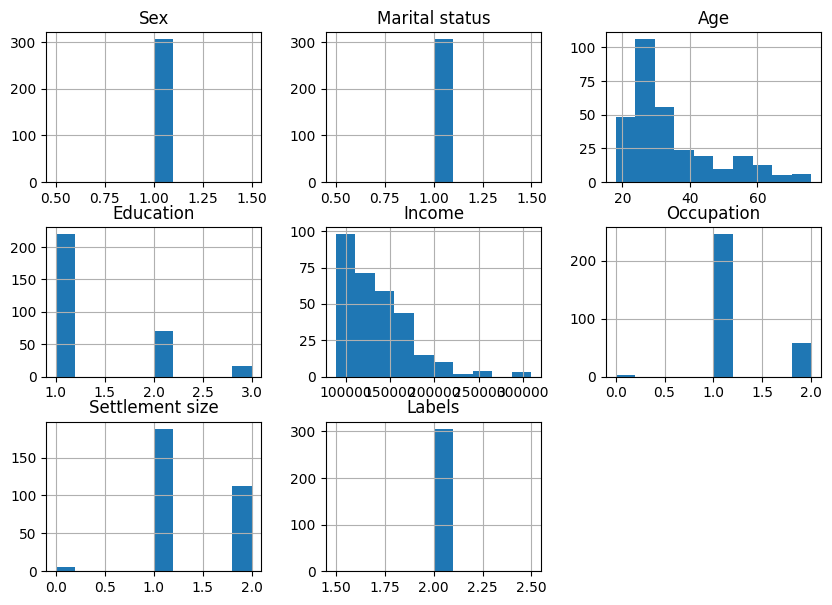

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(10,7))

## Cluster 3

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,517.0,40.001934,11.945532,20.0,31.0,37.0,47.0,75.0
Education,517.0,0.822050,0.612576,0.0,0.0,1.0,1.0,2.0
Income,517.0,145373.611219,38286.684815,82398.0,119276.0,136323.0,159757.0,287247.0
Occupation,517.0,1.266925,0.484577,0.0,1.0,1.0,2.0,2.0
Settlement size,517.0,1.529981,0.507283,0.0,1.0,2.0,2.0,2.0
Labels,517.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

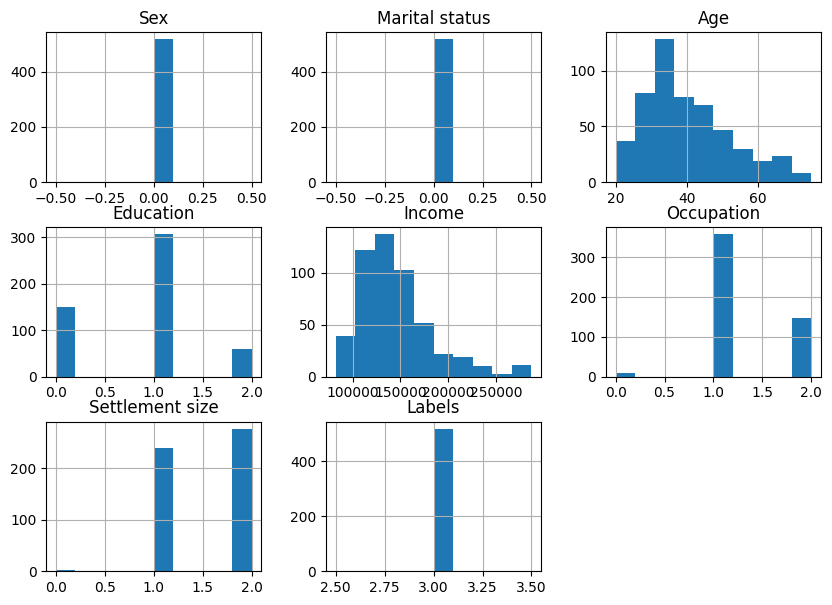

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(10,7))

## Cluster 4

In [ ]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,257.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,257.0,33.968872,10.759035,18.0,26.0,31.0,40.0,67.0
Education,257.0,1.268482,0.501851,1.0,1.0,1.0,1.0,3.0
Income,257.0,122976.723735,38529.241076,62263.0,96769.0,115369.0,146519.0,280570.0
Occupation,257.0,0.933852,0.630834,0.0,1.0,1.0,1.0,2.0
Settlement size,257.0,0.918288,0.827468,0.0,0.0,1.0,2.0,2.0
Labels,257.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

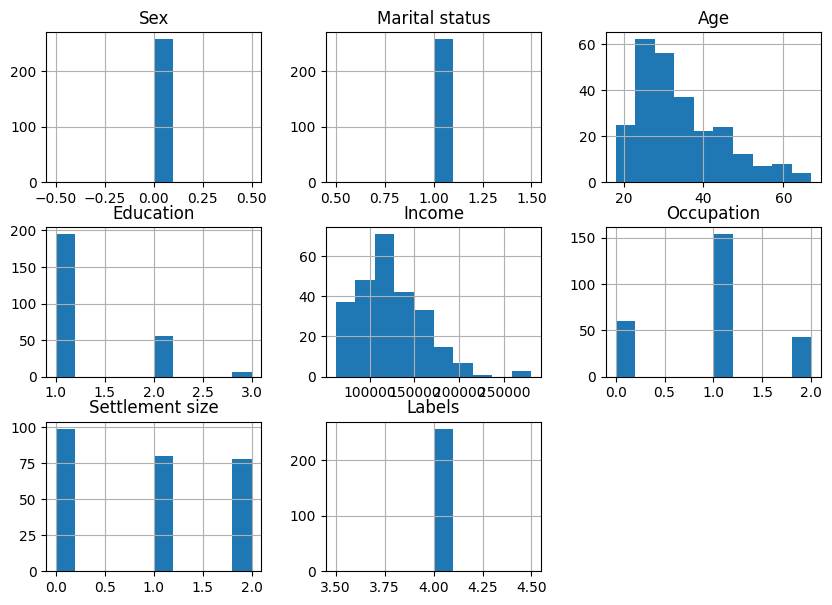

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(10,7))

## Cluster 5

In [ ]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,178.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,178.0,35.146067,9.755833,19.0,27.0,34.5,41.0,70.0
Education,178.0,0.932584,0.558403,0.0,1.0,1.0,1.0,3.0
Income,178.0,97997.241573,21702.050536,36760.0,80892.5,101511.0,113265.0,143321.0
Occupation,178.0,0.370787,0.507169,0.0,0.0,0.0,1.0,2.0
Settlement size,178.0,0.073034,0.260926,0.0,0.0,0.0,0.0,1.0
Labels,178.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

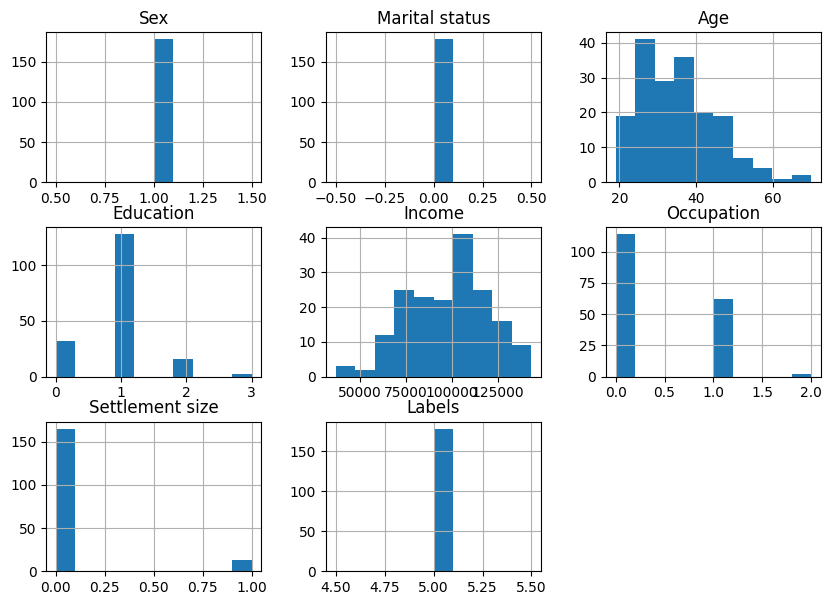

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(10,7))

## Using clusters centroids as a mean to understand each clusters

In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,3.885781e-16,1.332268e-15,0.245726,0.182692,0.030449,0.451144,0.484804
C1,1.000000e+00,1.000000e+00,0.403876,0.213953,0.005814,0.448891,0.375836
C2,1.000000e+00,1.000000e+00,0.444444,0.591503,0.676471,0.585119,0.405291
C3,2.553513e-15,1.776357e-15,0.274017,0.633462,0.764990,0.615822,0.524984
C4,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C5,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.433188,0.439125


In [ ]:
!pip install graphviz

## Decision tree as a method to interpret clusters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
import site
print(site.getsitepackages())

['/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages']


In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

## Evaluating decision tree

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       312
           1       1.00      1.00      1.00       430
           2       1.00      0.99      1.00       306
           3       1.00      0.98      0.99       517
           4       1.00      1.00      1.00       257
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



The result showed that the model is extremely accurate at predicting the customer groups. Hence, we can expect the split point to be accurate as well. We will proceed with the interpretation of the model using this technique.

# Visualization : Clustering Tree as Model Interpretability

We should call the information below as 'Clustering Tree' as it aids in defining the clustering algorithm parameters and gives an idea of how the data should be interpreted from our result. It is important to note that the clusters name depicted below are the same as defined in the previous section.

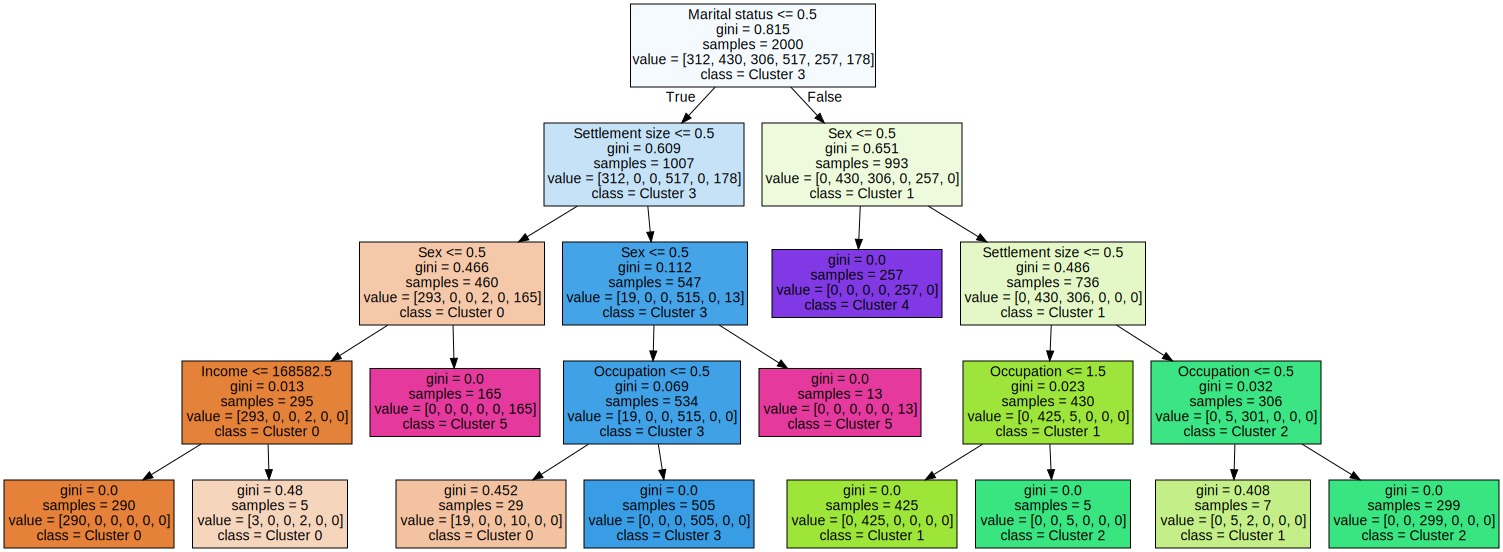

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#plt.savefig('DecisionTree.png')